In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as L
from sklearn.metrics import mean_squared_error, r2_score

## Loading testing data

In [2]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
# One variable data
df1 = df[['area', 'price']]

# Multi-variables data ( two variables )
df2 = df[['area', 'bedrooms', 'price']]

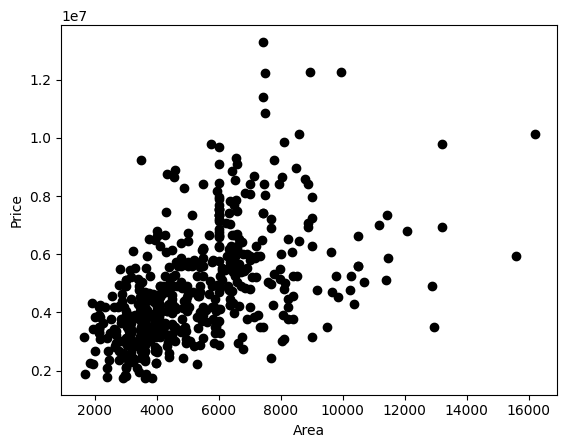

In [4]:
plt.scatter(y=df1["price"], x=df1["area"], c="k")

plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [5]:
X1 = df1.drop('price', axis=1)
y1 = df1['price']

X2 = df2.drop('price', axis=1)
y2 = df2['price']

In [6]:
# # A simple linear testing data

# X_train = np.array(range(30)).reshape(-1, 1)
# y_train = np.array(range(30))*2


# X_test = np.array([[1], [2], [5], [4], [6], [3], [6]])
# y_test = np.array([2, 4, 10, 9, 12, 5, 12])

## Testing

### Linear Regression

In [7]:
from Regression.LinearRegression import LinearRegression

In [8]:
model = LinearRegression()

In [9]:
model.fit(X1, y1 , epochs=100000)

Large values detected! Applying scaling to stabilize training.
Iteration 0: Loss = 0.047198, w = [0.00075761], b = 0.002611886794551015
Iteration 50: Loss = 0.024299, w = [0.03119277], b = 0.103033421780223
Iteration 100: Loss = 0.016363, w = [0.05124914], b = 0.1614643408507545
Iteration 150: Loss = 0.013588, w = [0.06518827], b = 0.19524385414321221
Iteration 200: Loss = 0.012593, w = [0.0755128], b = 0.2145535350734487
Iteration 250: Loss = 0.012213, w = [0.08369251], b = 0.22537197372683657
Iteration 300: Loss = 0.012045, w = [0.0905907], b = 0.23120975743722588
Iteration 350: Loss = 0.011951, w = [0.09671453], b = 0.23412825614134494
Iteration 400: Loss = 0.011884, w = [0.10236202], b = 0.23533785593054166
Iteration 450: Loss = 0.011827, w = [0.10770842], b = 0.23554924342912212
Iteration 500: Loss = 0.011773, w = [0.11285684], b = 0.2351796809399406
Iteration 550: Loss = 0.011722, w = [0.11786806], b = 0.23447413177035034
Iteration 600: Loss = 0.011672, w = [0.12277797], b = 0.23

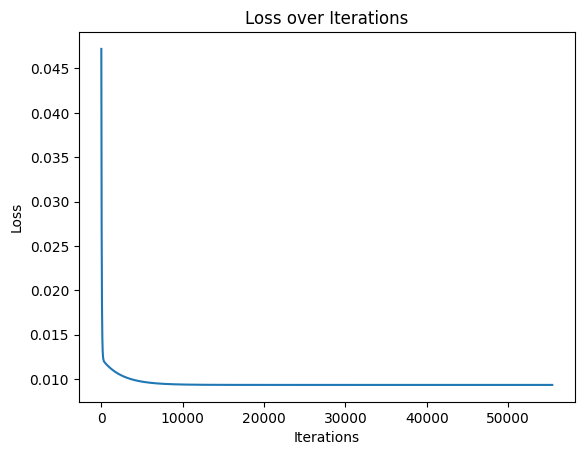

In [10]:
model.plot_loss()

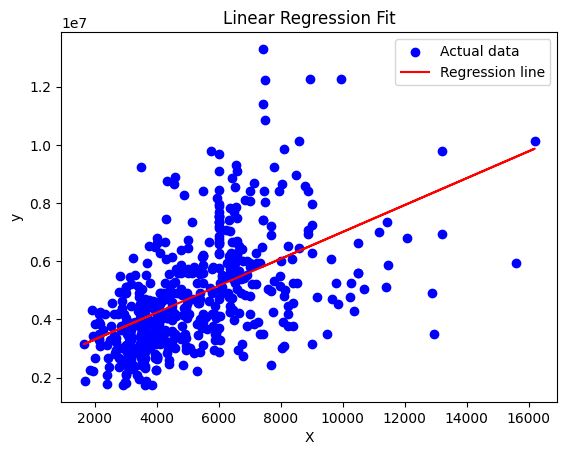

In [11]:
model.plot_regression_line(X1, y1)

In [12]:
model.score(y1, model.predict(X1))

{'R2 Score': 0.2872931546625921, 'RMSE': 1577612.5627813225}

#### Comparing with Sklearn Linear Regression model

In [13]:
LR = L()
LR.fit(np.array(X1).reshape(-1, 1), y1)

LinearRegression()

In [14]:
LR_predictions = LR.predict(np.array(X1).reshape(-1, 1))

In [15]:
np.sqrt(mean_squared_error(LR_predictions, np.array(y1).reshape(-1, 1)))

1577612.5627607866

In [16]:
r2_score(np.array(y1).reshape(-1, 1), LR_predictions)

0.2872931546811468

In [17]:
print(LR.coef_, LR.intercept_)

[461.97489427] 2387308.4823964303


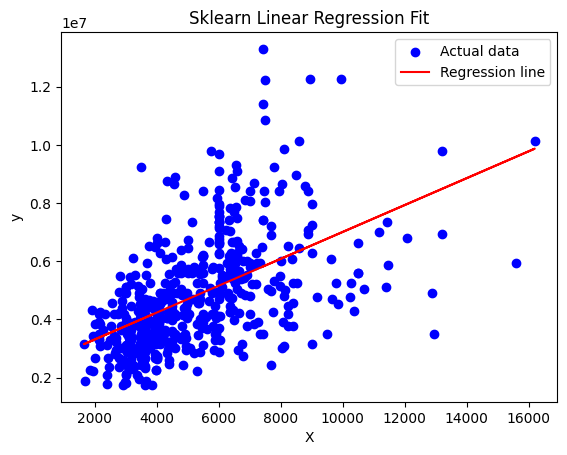

In [18]:
plt.scatter(X1, y1, color="blue", label="Actual data")
y_pred = LR.predict(np.array(X1).reshape(-1, 1))
plt.plot(X1, y_pred, color="red", label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sklearn Linear Regression Fit")
plt.legend()
plt.show()

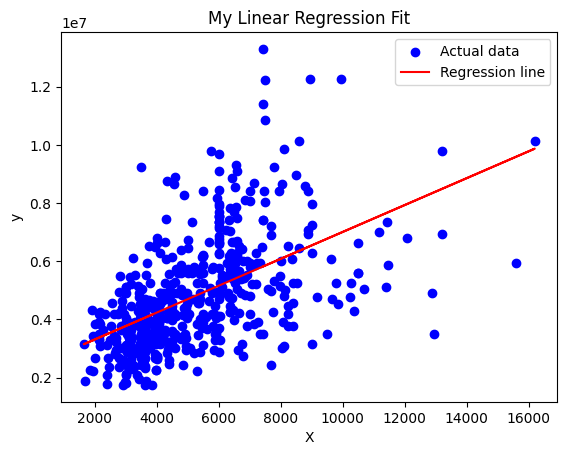

In [19]:
plt.scatter(X1, y1, color="blue", label="Actual data")
y_pred = model.predict(np.array(X1).reshape(-1, 1))
plt.plot(X1, y_pred, color="red", label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("My Linear Regression Fit")
plt.legend()
plt.show()

In [20]:
model = LinearRegression()
model.fit(X2, y2)

Large values detected! Applying scaling to stabilize training.
Iteration 0: Loss = 0.047198, w = [0.00075761 0.00111399], b = 0.002611886794551015
Iteration 50: Loss = 0.022110, w = [0.0302154  0.04313124], b = 0.09911927430767456
Iteration 100: Loss = 0.014683, w = [0.04848888 0.06700072], b = 0.15044289643154465
Iteration 150: Loss = 0.012450, w = [0.06067356 0.08101909], b = 0.1772785533607697
Iteration 200: Loss = 0.011744, w = [0.0695325 0.0896849], b = 0.19084738162214304
Iteration 250: Loss = 0.011489, w = [0.07656409 0.0954374 ], b = 0.19723336237579642
Iteration 300: Loss = 0.011366, w = [0.08258102 0.09959924], b = 0.19973511562357313
Iteration 350: Loss = 0.011284, w = [0.08802417 0.10288771], b = 0.20014104150899212
Iteration 400: Loss = 0.011215, w = [0.09313284 0.10569181], b = 0.19942070110038748
Iteration 450: Loss = 0.011151, w = [0.09803705 0.10822258], b = 0.19809968259606758
Iteration 500: Loss = 0.011089, w = [0.10280753 0.11059457], b = 0.1964628535282645
Iteratio

In [21]:
LR = L()
LR.fit(X2, y2)

LinearRegression()

In [22]:
print(f'My Linear regression: w = {model.w} b = {model.b}')
print(f'Sklearn Linear regression: w = {LR.coef_} b = {LR.intercept_}')

My Linear regression: w = [3.79768889e+02 6.73448508e+05] b = 820019.1804391518
Sklearn Linear regression: w = [4.23778537e+02 7.39565941e+05] b = 391125.60987726226


In [23]:
model.score(y2, model.predict(X2))

{'R2 Score': 0.36678941652140107, 'RMSE': 1487027.408669956}

In [24]:
LR_predictions = LR.predict(np.array(X2))
print(np.sqrt(mean_squared_error(LR_predictions, np.array(y2))))
print(r2_score(np.array(y2), LR_predictions))

1482672.469850625
0.37049285246705077


c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
